In [1]:
import pandas as pd

file = 'walmart.xlsx'
df = pd.read_excel(file)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

## Finding Null Values

In [3]:
df.isnull().sum()   # No null value in Sales and Order Date column

City                      0
Customer Age            903
Customer Name             0
Customer Segment          0
Discount                  0
Number of Records         0
Order Date                0
Order ID                  0
Order Priority            0
Order Quantity            0
Product Base Margin      63
Product Category          0
Product Container         0
Product Name              0
Product Sub-Category      0
Profit                    0
Region                    0
Row ID                    0
Sales                     0
Ship Date                 0
Ship Mode                 0
Shipping Cost             0
State                     0
Unit Price                0
Zip Code                  0
dtype: int64

In [4]:
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


## Outlier detection

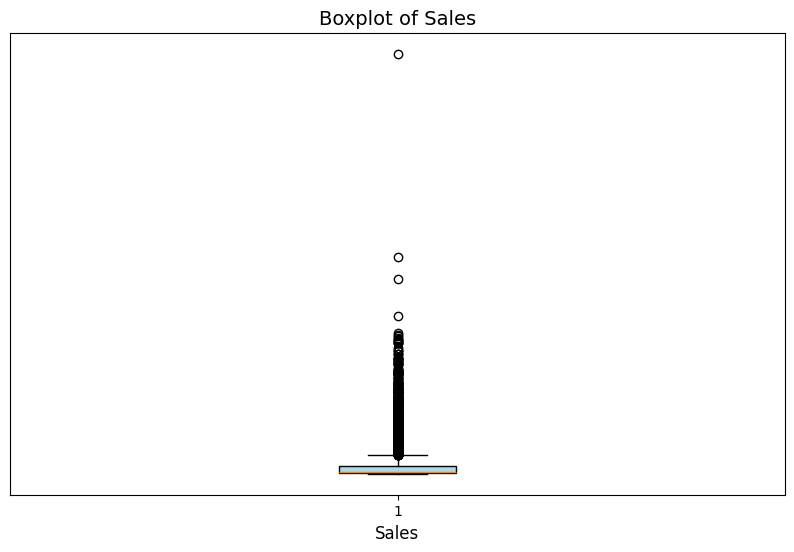

In [33]:
import matplotlib.pyplot as plt

# Boxplot data
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(df['Sales'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Extract boxplot statistics
Q1 = boxplot['boxes'][0].get_path().vertices[0][1]  # First quartile (Q1)
Q3 = boxplot['boxes'][0].get_path().vertices[2][1]  # Third quartile (Q3)
median = boxplot['medians'][0].get_ydata()[0]       # Median
whisker_low = boxplot['whiskers'][0].get_ydata()[1] # Lower whisker
whisker_high = boxplot['whiskers'][1].get_ydata()[1] # Upper whisker
outliers = boxplot['fliers'][0].get_ydata()         # Outliers


# Set plot labels and title
plt.title('Boxplot of Sales', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.yticks([])
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


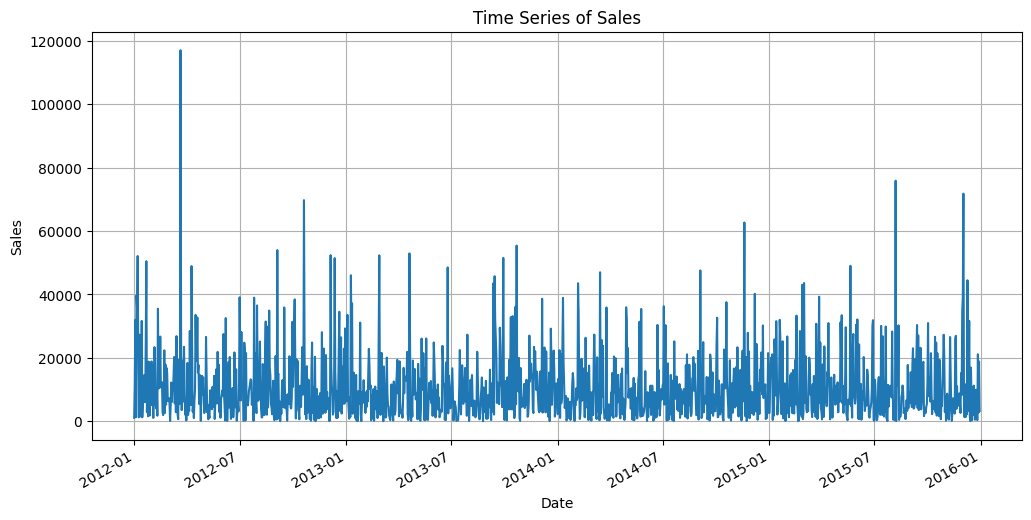

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Order Date' to datetime and aggregate sales by date
df['Order Date'] = pd.to_datetime(df['Order Date'])
time_series = df.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
time_series.plot(title='Time Series of Sales', xlabel='Date', ylabel='Sales', grid=True)
plt.show()


## Finding Outliers using IQR, & removing them

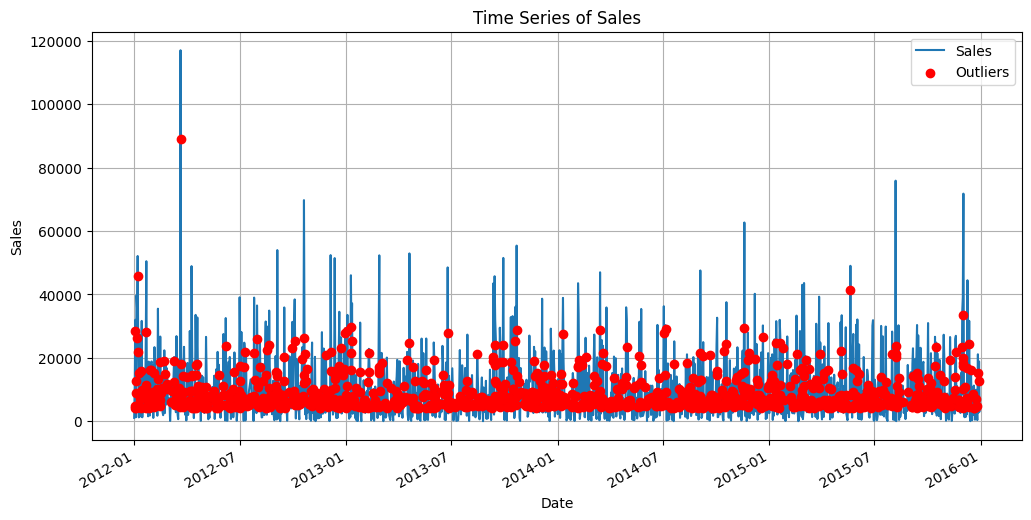

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Order Date' to datetime and aggregate sales by date
df['Order Date'] = pd.to_datetime(df['Order Date'])
time_series = df.groupby('Order Date')['Sales'].sum()

# Calculate IQR for detecting outliers
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# Plot the time series
plt.figure(figsize=(12, 6))
time_series.plot(title='Time Series of Sales', xlabel='Date', ylabel='Sales', grid=True)

# Plot the outliers in red
plt.scatter(outliers['Order Date'], outliers['Sales'], color='red', label='Outliers', zorder=5)

plt.legend()
plt.show()


In [7]:
# Calculate IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]


# Optionally remove outliers
df_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]


In [8]:
print("Outliers detected:\n")
outliers

Outliers detected:



,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.8500,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559
7,Napa,NaN,Alan Schoenberger,Corporate,0.05,1,2012-01-02,37537,Low,32,...,1438.4900,West,5274,4902.38,2012-01-09,Regular Air,7.07,California,155.06,94559
17,Baton Rouge,NaN,Andy Reiter,Corporate,0.05,1,2012-01-03,9637,Low,49,...,14440.3900,South,1316,28359.40,2012-01-10,Regular Air,24.49,Louisiana,574.74,70802
21,Bedford,NaN,Darren Budd,Consumer,0.07,1,2012-01-05,57253,Critical,48,...,-335.2400,Central,8013,12635.75,2012-01-05,Regular Air,35.00,Texas,279.48,76021
26,Norman,NaN,Pauline Chand,Small Business,0.02,1,2012-01-05,28451,Critical,41,...,2593.1400,Central,3982,8958.46,2012-01-06,Regular Air,21.21,Oklahoma,209.84,73071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,Lewiston,85.0,Ann Blume,Corporate,0.01,1,2015-12-23,7751,Not Specified,45,...,-768.1400,East,1051,4547.90,2015-12-24,Delivery Truck,58.20,Maine,95.98,4240
8364,Deer Park,86.0,Anthony Witt,Corporate,0.06,1,2015-12-24,44992,Critical,32,...,-536.1660,Central,6347,7110.24,2015-12-26,Delivery Truck,69.64,Texas,218.75,77536
8372,Ann Arbor,86.0,Giulietta Weimer,Corporate,0.00,1,2015-12-25,12129,Medium,36,...,-1197.5800,Central,1681,4852.05,2015-12-28,Delivery Truck,70.20,Michigan,122.99,48104
8382,Tonawanda,86.0,Alan Haines,Consumer,0.10,1,2015-12-27,28611,Low,30,...,6670.4090,East,4008,15337.58,2015-12-30,Regular Air,19.99,New York,525.98,14150


## After Removing Outliers

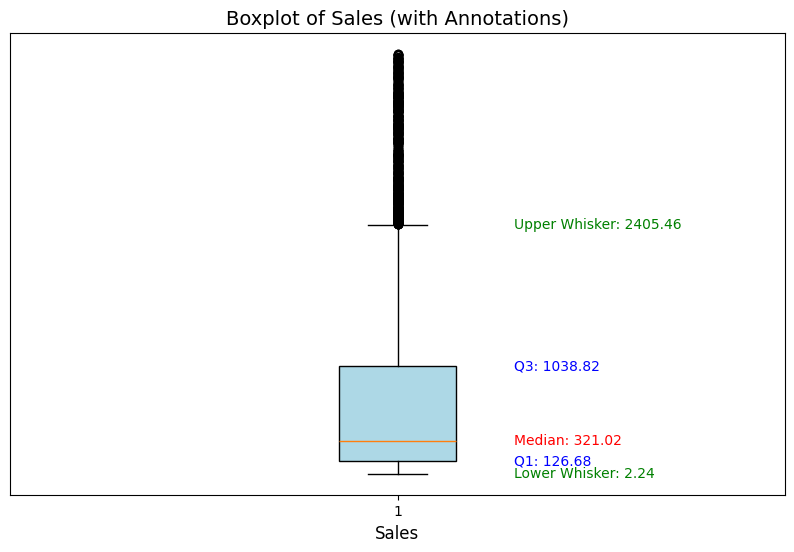

In [14]:
import matplotlib.pyplot as plt

# Boxplot data
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(df_cleaned['Sales'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Extract boxplot statistics
Q1 = boxplot['boxes'][0].get_path().vertices[0][1]  # First quartile (Q1)
Q3 = boxplot['boxes'][0].get_path().vertices[2][1]  # Third quartile (Q3)
median = boxplot['medians'][0].get_ydata()[0]       # Median
whisker_low = boxplot['whiskers'][0].get_ydata()[1] # Lower whisker
whisker_high = boxplot['whiskers'][1].get_ydata()[1] # Upper whisker
outliers = boxplot['fliers'][0].get_ydata()         # Outliers

# Plot annotations with proper alignment
plt.text(1.15, whisker_low, f'Lower Whisker: {whisker_low:.2f}', va='center', ha='left', fontsize=10, color='green')
plt.text(1.15, Q1, f'Q1: {Q1:.2f}', va='center', ha='left', fontsize=10, color='blue')
plt.text(1.15, median, f'Median: {median:.2f}', va='center', ha='left', fontsize=10, color='red')
plt.text(1.15, Q3, f'Q3: {Q3:.2f}', va='center', ha='left', fontsize=10, color='blue')
plt.text(1.15, whisker_high, f'Upper Whisker: {whisker_high:.2f}', va='center', ha='left', fontsize=10, color='green')

# Set plot labels and title
plt.title('Boxplot of Sales (with Annotations)', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.yticks([])
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


C:\Users\deven\AppData\Local\Temp\ipykernel_43116\3238311948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Order Date'] = pd.to_datetime(df['Order Date'])


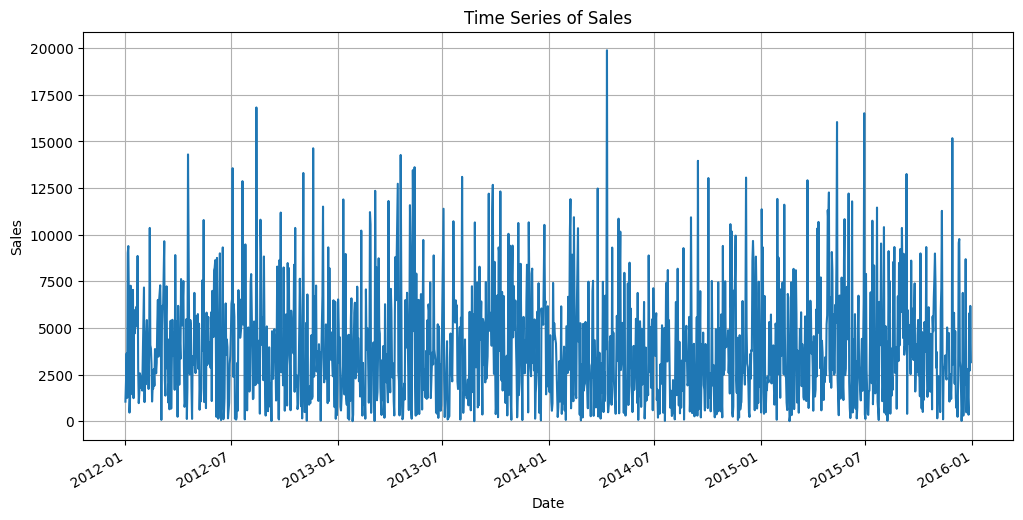

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Order Date' to datetime and aggregate sales by date
df_cleaned['Order Date'] = pd.to_datetime(df['Order Date'])
time_series = df_cleaned.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
time_series.plot(title='Time Series of Sales', xlabel='Date', ylabel='Sales', grid=True)
plt.show()


In [34]:
df_cleaned.to_csv('df_cleaned.csv', index=False)


# Removing outliers using z-score

In [24]:
from scipy.stats import zscore

# Calculate z-scores
df['z_score'] = zscore(df['Sales'])

# Identify outliers (e.g., |z| > 3)
outliers = df[df['z_score'].abs() > 3]

# Optionally remove outliers
df_cleaned = df[df['z_score'].abs() <= 3]


In [25]:
print("Outliers detected:\n")
outliers

Outliers detected:



,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code,z_score
17,Baton Rouge,NaN,Andy Reiter,Corporate,0.05,1,2012-01-03,9637,Low,49,...,South,1316,28359.40,2012-01-10,Regular Air,24.49,Louisiana,574.74,70802,7.415545
21,Bedford,NaN,Darren Budd,Consumer,0.07,1,2012-01-05,57253,Critical,48,...,Central,8013,12635.75,2012-01-05,Regular Air,35.00,Texas,279.48,76021,3.029391
37,Galesburg,NaN,Julia West,Home Office,0.04,1,2012-01-06,23488,Critical,30,...,Central,3284,26133.39,2012-01-07,Delivery Truck,44.55,Illinois,880.98,61401,6.794594
52,Franklin Square,NaN,Jasper Cacioppo,Home Office,0.07,1,2012-01-07,3073,Medium,7,...,East,452,45923.76,2012-01-08,Regular Air,24.49,New York,6783.02,11010,12.315171
61,Edmonds,NaN,Ruben Dartt,Corporate,0.03,1,2012-01-08,7203,High,25,...,West,998,21752.01,2012-01-10,Regular Air,19.99,Washington,896.99,98026,5.572396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,Oshkosh,77.0,Sean Miller,Small Business,0.00,1,2015-12-09,46276,Critical,23,...,Central,6500,16743.76,2015-12-11,Regular Air,24.49,Wisconsin,699.99,54901,4.175331
8317,Newark,79.0,Julia Barnett,Corporate,0.04,1,2015-12-12,59781,Not Specified,28,...,East,8368,24391.16,2015-12-13,Delivery Truck,44.55,New Jersey,880.98,7101,6.308594
8327,Lincoln Park,79.0,Ricardo Emerson,Corporate,0.09,1,2015-12-15,7427,Not Specified,47,...,Central,1013,16002.29,2015-12-15,Regular Air,19.99,Michigan,363.25,48146,3.968496
8382,Tonawanda,86.0,Alan Haines,Consumer,0.10,1,2015-12-27,28611,Low,30,...,East,4008,15337.58,2015-12-30,Regular Air,19.99,New York,525.98,14150,3.783073


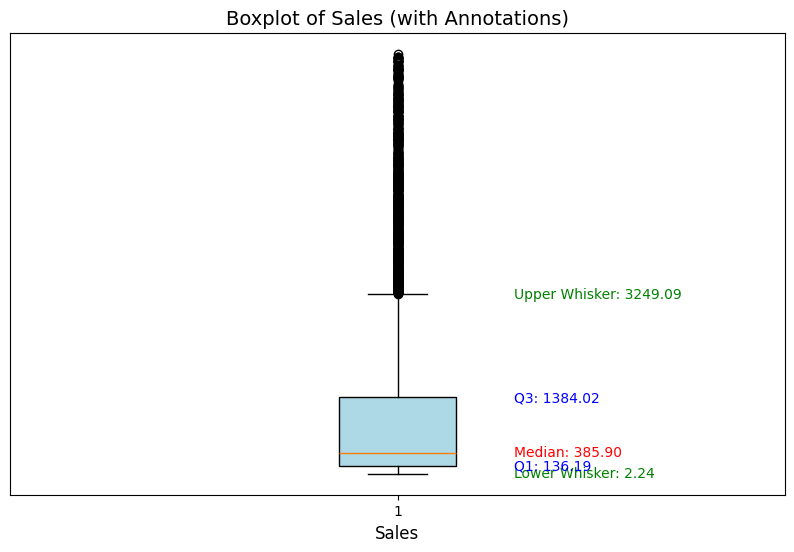

In [36]:
import matplotlib.pyplot as plt

# Boxplot data
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(df_cleaned_z['Sales'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Extract boxplot statistics
Q1 = boxplot['boxes'][0].get_path().vertices[0][1]  # First quartile (Q1)
Q3 = boxplot['boxes'][0].get_path().vertices[2][1]  # Third quartile (Q3)
median = boxplot['medians'][0].get_ydata()[0]       # Median
whisker_low = boxplot['whiskers'][0].get_ydata()[1] # Lower whisker
whisker_high = boxplot['whiskers'][1].get_ydata()[1] # Upper whisker
outliers = boxplot['fliers'][0].get_ydata()         # Outliers

# Plot annotations with proper alignment
plt.text(1.15, whisker_low, f'Lower Whisker: {whisker_low:.2f}', va='center', ha='left', fontsize=10, color='green')
plt.text(1.15, Q1, f'Q1: {Q1:.2f}', va='center', ha='left', fontsize=10, color='blue')
plt.text(1.15, median, f'Median: {median:.2f}', va='center', ha='left', fontsize=10, color='red')
plt.text(1.15, Q3, f'Q3: {Q3:.2f}', va='center', ha='left', fontsize=10, color='blue')
plt.text(1.15, whisker_high, f'Upper Whisker: {whisker_high:.2f}', va='center', ha='left', fontsize=10, color='green')

# Set plot labels and title
plt.title('Boxplot of Sales (with Annotations)', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.yticks([])
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
